## Chi-squared Test of Independence for Business Entity Dataset
Submitted by Natalie Toler, Student ID 011148248, Capstone for WGU's MSDA program

#### Table of Contents
- A. Research Question
- B. Data Collection
- C. Data Extration and Preparation
- D. Analysis
- E. Data Summary and Implications
- F. Sources

#### A. Research Question

Entrepreneurship serves as a fundamental pillar of capitalism. During periods of recession, depression, and other economic challenges, the United States government promotes the establishment of small businesses. The emergence of new businesses leads to increased employment, greater economic activity, and a strengthened capital system. However, various studies have highlighted that the failure of these new enterprises can result in wasted resources allocated by the government and negatively impact local economies. This complexity within the business lifecycle has prompted numerous investigations into the factors contributing to business failure. While many studies emphasize industry categorization or active cash flow, the selection of business structure remains an area that has received less attention.

The choice of business structure is often one of the first decisions an entrepreneur must make. This decision is critical, as it influences access to tax credits and funding opportunities—two key factors that can contribute to a business's success or failure due to inadequate funding and planning. Therefore, it is prudent to explore whether the selected business structure might play a significant role in determining success or failure.

This study seeks to investigate whether there is a significant difference in survival rates among various businesses registered in Colorado.

To answer this question, a chi-squared test will be employed. The null hypothesis (H₀) posits that there is no significant difference in survival rates among different businesses registered in Colorado. Conversely, the alternative hypothesis (H₁) asserts that there is a significant difference in survival rates among these businesses.

The chi-square test is a robust statistical method utilized to compare categorical variables and evaluate the independence between groups. This test is commonly applied in survival studies across various fields, employing both the p-value and the chi-square statistic as evaluative metrics.

#### B. Data Collection

The data for this study is sourced from the Colorado Information Marketplace, an open-source data catalog. The business entities dataset includes records of business entities registered in the state of Colorado from 1886 to 2024, encompassing 2.71 million rows. Given that only 25% of businesses reach the 15-year milestone, this study will specifically focus on business entities established between 2000 and 2024. Out of the 35 columns in the dataset, only seven will be utilized for the analysis: EntityID (a unique identifier for each established entity), Entity Type (which categorizes businesses into 33 distinct types), Entity Status (indicating the status of each entity as of October 2, 2024, when the data was exported), and Entity Form Date (the date of entity formation). Additionally, locational columns such as Principal City, Principal State, and Jurisdiction of Formation will be examined to evaluate their impact on the performance of different business types with respect to business success. 

The dataset utilized for this analysis consists of actual business license records, providing a reliable source of data. An advantage of this dataset is that key variables such as entity type, name, and status are complete and free of null values, ensuring accuracy and minimizing concerns related to missing data.

However, a disadvantage encountered during the initial data review was the presence of more unique values in the status and entity type variables than required for the analysis. These variables need to be consolidated to better align with the objectives of the study and ensure the best results from the chi-squared test. One other challenge that was encounted during the exploratory data analysis was the presence of duplicate entities that had reregistered with the Department of State. The existence of these duplicates violates one of the central assumptions of the chi-squared test of independence, which is that each observation is assumed to be indendent of the others. While removing one set of the duplicated entities, whether the first or last instance of that entity name, was a viable option, doing so would bias the data. Further investigation into each of these entities could allow for adjustments in the data to keep the entities without violating the assumption of independence, however that process would be outside the timeframe and budget of this project. Therefore the choice made was to drop all instances of duplicated entities, which amounted to about 600 dropped rows. While these adjustments are manageable in the data preparation phase, they require careful decision-making to ensure that the data remains accurate and meaningful.

#### C. Data Extraction and Preparation

##### Exploratory Data Analysis

The dataset was obtained from the Colorado Information Marketplace on October 15, 2024. To gain a comprehensive understanding of the data, an exploratory data analysis (EDA) was conducted. The findings from the EDA are presented below, accompanied by commentary. The analysis was performed using Jupyter Notebook with Python, utilizing the Pandas and Numpy libraries for data manipulation, and the Matplotlib and Seaborn libraries for data visualization. While these tools offer extensive capabilities for in-depth analysis, it is important to use them judiciously to maintain focus and avoid potential pitfalls.

In [1]:
# Import the appropriate packages and alias them to standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set columns to max for better visual analysis
pd.set_option('display.max_columns', None)

# Read in the Data
df = pd.read_csv("Business_Entities_in_Colorado_20241015.csv")
df.head()

,entityid,entityname,principaladdress1,principaladdress2,principalcity,principalstate,principalzipcode,principalcountry,mailingaddress1,mailingaddress2,mailingcity,mailingstate,mailingzipcode,mailingcountry,entitystatus,jurisdictonofformation,entitytype,agentfirstname,agentmiddlename,agentlastname,agentsuffix,agentorganizationname,agentprincipaladdress1,agentprincipaladdress2,agentprincipalcity,agentprincipalstate,agentprincipalzipcode,agentprincipalcountry,agentmailingaddress1,agentmailingaddress2,agentmailingcity,agentmailingstate,agentmailingzipcode,agentmailingcountry,entityformdate
0,19791372531,"21st Century Foods, Inc., Dissolved January 1,...",1701 W. 72nd Avenue,Adams County,Denver,CO,80221,US,NaN,NaN,NaN,NaN,NaN,NaN,Administratively Dissolved,CO,DPC,Bill,NaN,Curphy,NaN,NaN,8901 Clay,NaN,Federal Heights,CO,80221,US,NaN,NaN,NaN,NaN,NaN,NaN,05/09/1979
1,19871000673,RURAL DITCH COMPANY,1701 S Lafayette St,NaN,Denver,CO,80210,US,PO Box 119,NaN,Longmont,CO,80502,US,Good Standing,CO,DNC,Angela,Rae,Swanson,NaN,NaN,1701 S Lafayette St,NaN,Denver,CO,80210,US,PO Box 119,Longmont Co 80502-0,Longmont,CO,80502,US,02/13/1873
2,19871000913,THE BOX ELDER DITCH COMPANY,207 Windflower Way,NaN,Severance,CO,80550,US,NaN,NaN,NaN,NaN,NaN,NaN,Good Standing,CO,DNC,MELISSA,NaN,BUICK,NaN,NaN,207 Windflower Way,NaN,Severance,CO,80550,US,NaN,NaN,NaN,NaN,NaN,NaN,12/25/1873
3,19871000986,HIGHLAND DITCH COMPANY,4311 STATE HWY 66,Suite 4309,Mead,CO,80542,US,PO Box 649,NaN,Mead,CO,80542,US,Good Standing,CO,DNC,JILL,NaN,BATY,NaN,NaN,4311 STATE HWY 66,Suite 4309,Mead,CO,80542,US,PO BOX 649,NaN,MEAD,CO,80542,US,04/13/1874
4,19871000748,LAKE CANAL COMPANY OF COLORADO,207 Windflower Way,NaN,Severance,CO,80550,US,NaN,NaN,NaN,NaN,NaN,NaN,Good Standing,CO,DNC,Melissa,NaN,Buick,NaN,NaN,207 Windflower Way,NaN,Severance,CO,80550,US,207 Windflower Way,NaN,Severance,CO,80550,US,11/18/1872


In [2]:
# Check the Columns and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739992 entries, 0 to 2739991
Data columns (total 35 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   entityid                int64 
 1   entityname              object
 2   principaladdress1       object
 3   principaladdress2       object
 4   principalcity           object
 5   principalstate          object
 6   principalzipcode        object
 7   principalcountry        object
 8   mailingaddress1         object
 9   mailingaddress2         object
 10  mailingcity             object
 11  mailingstate            object
 12  mailingzipcode          object
 13  mailingcountry          object
 14  entitystatus            object
 15  jurisdictonofformation  object
 16  entitytype              object
 17  agentfirstname          object
 18  agentmiddlename         object
 19  agentlastname           object
 20  agentsuffix             object
 21  agentorganizationname   object
 22  agentprincipaladdr

In [3]:
# Check for number of unique values in each column
df.nunique()

entityid                  2739992
entityname                2739357
principaladdress1         1741747
principaladdress2           99873
principalcity               26134
principalstate                 74
principalzipcode            96514
principalcountry              164
mailingaddress1            521801
mailingaddress2             45277
mailingcity                 18870
mailingstate                   73
mailingzipcode              52002
mailingcountry                149
entitystatus                   15
jurisdictonofformation       1345
entitytype                     33
agentfirstname             111974
agentmiddlename             47489
agentlastname              289546
agentsuffix                   373
agentorganizationname      158942
agentprincipaladdress1    1438806
agentprincipaladdress2      69046
agentprincipalcity          11629
agentprincipalstate             9
agentprincipalzipcode       66832
agentprincipalcountry          10
agentmailingaddress1       381656
agentmailingad

Of note, there are less unique entity names than entity id which suggests that there are duplicated entities. This will need to be explored further. 

In [5]:
# Check for Duplicated rows
sum(df.duplicated())

0

In [6]:
# Check for nulls
df.isnull().sum()

entityid                        0
entityname                      3
principaladdress1           87062
principaladdress2         2378572
principalcity               87207
principalstate              87279
principalzipcode            87691
principalcountry            87355
mailingaddress1           1917323
mailingaddress2           2630166
mailingcity               1917313
mailingstate              1917272
mailingzipcode            1917327
mailingcountry            1855158
entitystatus                    0
jurisdictonofformation          7
entitytype                      0
agentfirstname             707661
agentmiddlename           1675603
agentlastname              707659
agentsuffix               2673428
agentorganizationname     2195041
agentprincipaladdress1     162774
agentprincipaladdress2    2388803
agentprincipalcity         162744
agentprincipalstate        162627
agentprincipalzipcode      162733
agentprincipalcountry      162627
agentmailingaddress1      2099723
agentmailingad

In [7]:
# Further check the variables 'entityname', 'entitystatus', 'entitytype', and 'entityformdate'
entity_variables = ['entityname', 'entitystatus', 'entitytype', 'entityformdate']
df[entity_variables].sample(5)

,entityname,entitystatus,entitytype,entityformdate
2096777,"G2L Consulting, LLC, Delinquent July 1, 2022",Delinquent,DLLC,02/16/2021
1199099,"Evolution Personal Training, LLC, Delinquent J...",Delinquent,DLLC,02/27/2013
2606993,Honeys Comfort Care Home LLC,Good Standing,DLLC,02/02/2024
1149413,"ACQUIRED CAPITAL II, L.P., Colorado Authority ...",Withdrawn,FLP,07/30/2012
2274747,Way Out West Coffee LLC,Good Standing,DLLC,04/12/2022


In [8]:
# Create a dataframe with only those variables
entity_variables = df[entity_variables]
entity_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739992 entries, 0 to 2739991
Data columns (total 4 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   entityname      object
 1   entitystatus    object
 2   entitytype      object
 3   entityformdate  object
dtypes: object(4)
memory usage: 83.6+ MB


In [9]:
# Check the number of Unique values
entity_variables.nunique()

entityname        2739357
entitystatus           15
entitytype             33
entityformdate      22857
dtype: int64

In [10]:
# Check the value counts of the "entitytype" variables
entity_variables['entitytype'].value_counts()

entitytype
DLLC        1818444
DPC          498389
DNC          119920
FPC          113273
FLLC         109410
DLP           22122
DLLP          13123
DLLLP         11704
FLP            8366
FNC            7940
FO             4930
GP             3850
DPC-PBC        2726
FLLP           1012
IC              958
DC56            721
DLPA            516
UNA             481
FLLLP           446
DT              297
DLCA            293
CS              289
WC              221
DC55            181
FCOOP           145
DLCA-PBC         84
DC56-PBC         51
CU               39
DC55-PBC         27
SL               21
FLPA              6
FLCA              5
SP                2
Name: count, dtype: int64

Of note, the uneven distribution of business types will necessitate consolidating the business types into broader categories. 

In [11]:
# Check the value counts of "entitystatus"
entity_variables['entitystatus'].value_counts()

entitystatus
Good Standing                 972957
Delinquent                    968567
Voluntarily Dissolved         490558
Administratively Dissolved    157887
Withdrawn                      69787
Noncompliant                   28954
Revoked                        20703
Exists                         15811
Merged                          9682
Converted                       3781
Registered Agent Resigned        659
Judicially Dissolved             267
Effectiveness Prevented          217
Dissolved (Term Expired)         144
Consolidated                      18
Name: count, dtype: int64

Again these variables will need to be consolidated into a simplier binary of "exists" and "doesn't exist". While breaking down the different ways that companies end would be an interesting line of inquiry that is not within the scope of this project which is merely asking whether the success or failure of a business can be correlated to the type of business. 

In [12]:
# Check for duplicated entity names
sum(entity_variables['entityname'].duplicated())

634

In [13]:
# Identify duplicated entity names
duplicated_entities = entity_variables[entity_variables['entityname'].duplicated(keep=False)]
duplicated_entities.sample(10)

,entityname,entitystatus,entitytype,entityformdate
652286,"MVDC, LLC",Good Standing,FLLC,12/29/2005
85318,SPECTRUM MEDIA CORPORATION,Merged,DPC,09/23/1983
2093909,"RCAM Technologies, Inc.",Converted,FPC,02/09/2021
803418,"Now Heating & Air, LLC",Converted,FLLC,12/06/2007
148827,"DELLACROCE PROPERTIES, INC.",Merged,DPC,06/04/1993
1397915,"Architectural Wall Systems, LLC",Converted,FLLC,04/06/2015
651634,Oxford 2005 LLLP,Good Standing,DLLLP,01/01/2006
1744635,"FinGoal, Inc.",Converted,FPC,05/23/2018
649207,Pajis CO-DE LLC,Good Standing,FLLC,11/30/2005
59541,"Preferred Financial Corporation, LLC",Converted,FLLC,12/19/1958


In [14]:
# Identify all duplicated entity names (both original and duplicate rows)
duplicated_entities = entity_variables[entity_variables['entityname'].duplicated(keep=False)]

# Sort by 'entityname' so that the original and its duplicates are next to each other
duplicated_entities_sorted = duplicated_entities.sort_values(by='entityname')

# Group by 'entityname' to get the original and duplicates together
grouped = duplicated_entities_sorted.groupby('entityname')

# Display the rows for each duplicated entity name
for name, group in grouped:
    print(f"\nEntity Name: {name}")
    print(group)


Entity Name: 1044 Two Creeks, LLC
                   entityname             entitystatus entitytype  \
2011731  1044 Two Creeks, LLC            Good Standing       DLLC   
2011737  1044 Two Creeks, LLC  Effectiveness Prevented       DLLC   

        entityformdate  
2011731     07/24/2020  
2011737     07/24/2020  

Entity Name: 10900 Investment Management, LLC
                               entityname   entitystatus entitytype  \
1119546  10900 Investment Management, LLC  Good Standing       DLLC   
1119545  10900 Investment Management, LLC  Good Standing       DLLC   

        entityformdate  
1119546     03/13/2012  
1119545     03/13/2012  

Entity Name: 1970 INCORPORATED, Dissolved January 1, 1974
                                         entityname  \
50305  1970 INCORPORATED, Dissolved January 1, 1974   
50381  1970 INCORPORATED, Dissolved January 1, 1974   

                     entitystatus entitytype entityformdate  
50305  Administratively Dissolved        DPC     05/18/1966

As addressed in section B, the best way to maintain data integrity while also keeping the assumption of independence will be to remove all duplicated entities. The output here illustrates the complication of trying to keep any record that has registered multiple times. Would a business that merged in its life cycle be counted as successful if it's most recent record has it in good standing while a company that's last status is merged be counted as unsuccessful? That would require an understanding of the merger and the business in each instance. As such, and with such a robust dataset, the best choice is to drop those records. 

In [15]:
# Check for null values
entity_variables.isnull().sum()

entityname        3
entitystatus      0
entitytype        0
entityformdate    0
dtype: int64

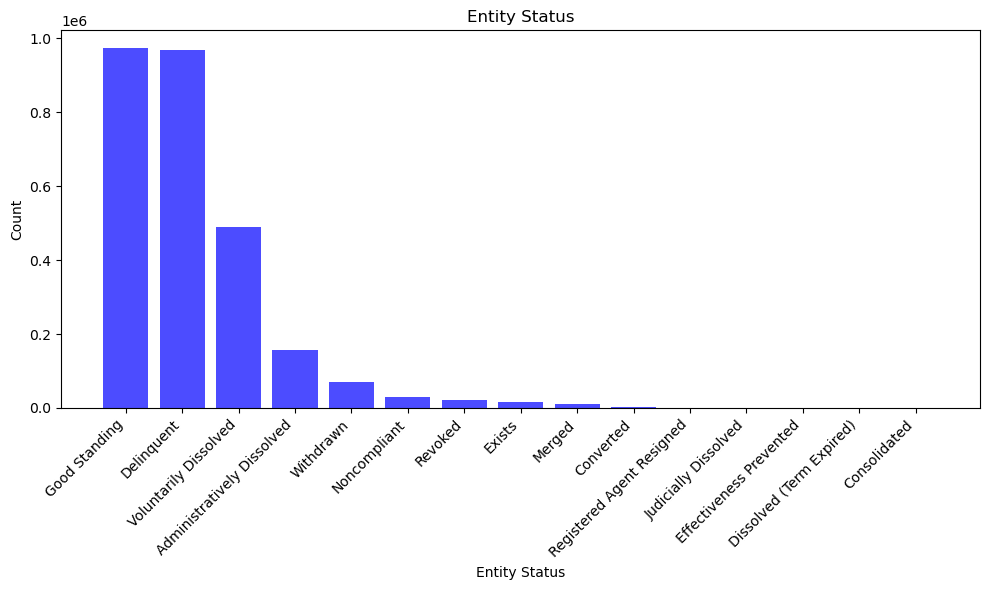

In [16]:
# Calculate the value counts for entitystatus
entitystatus_counts = entity_variables['entitystatus'].value_counts()

# Plot bar chart for entitystatus
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.bar(entitystatus_counts.index, entitystatus_counts.values, color='blue', alpha=0.7, width=0.8)
plt.title('Entity Status')
plt.xlabel('Entity Status')
plt.ylabel('Count')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Add layout adjustments
plt.tight_layout()
plt.show()

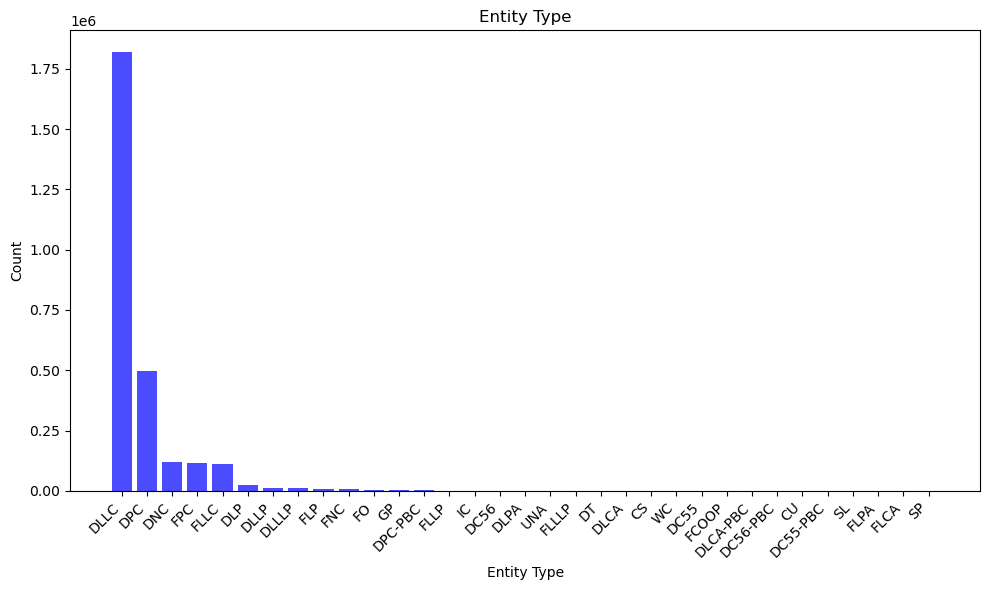

In [17]:
# Calculate the value counts for entitystatus
entitytype_counts = entity_variables['entitytype'].value_counts()

# Plot bar chart for entitystatus
plt.figure(figsize=(10, 6))
plt.bar(entitytype_counts.index, entitytype_counts.values, color='blue', alpha=0.7, width=0.8)
plt.title('Entity Type')
plt.xlabel('Entity Type')
plt.ylabel('Count')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Add layout adjustments
plt.tight_layout()
plt.show()

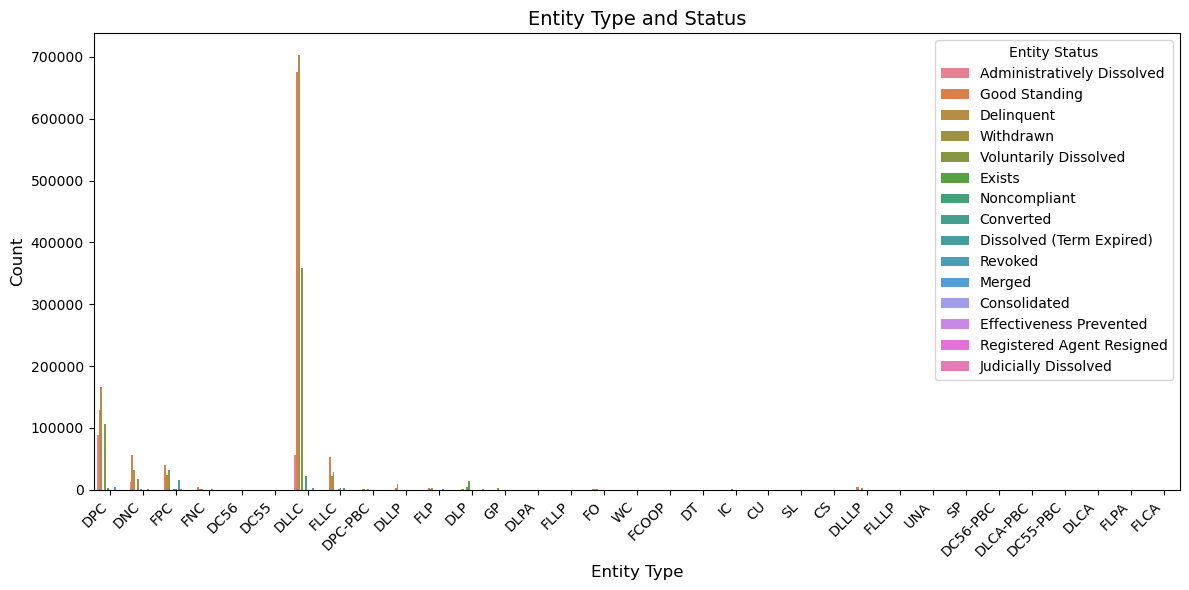

In [18]:
# Adjust the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the countplot
sns.countplot(data=entity_variables, x="entitytype", hue="entitystatus")

# Add a title and labels
plt.title("Entity Type and Status", fontsize=14)
plt.xlabel("Entity Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add legend title and adjust layout
plt.legend(title="Entity Status", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# Check the location variables
entity_location = ['principalcity', 'principalstate', 'jurisdictonofformation', 'entitystatus', 'entitytype']
sample = df[entity_location].sample(5)
print(sample)

          principalcity principalstate jurisdictonofformation   entitystatus  \
2492561  Pagosa Springs             CO                     CO     Delinquent   
501930         HESPERUS             CO                     CO     Delinquent   
2274630          Denver             CO                     CO     Delinquent   
1942624      Centennial             CO                     CO  Good Standing   
1615073          DENVER             CO                     CO     Delinquent   

        entitytype  
2492561       DLLC  
501930        DLLC  
2274630       DLLC  
1942624       DLLC  
1615073       DLLC  


In [20]:
# Create a dataframe for these variables
entity_location = df[entity_location]
entity_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739992 entries, 0 to 2739991
Data columns (total 5 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   principalcity           object
 1   principalstate          object
 2   jurisdictonofformation  object
 3   entitystatus            object
 4   entitytype              object
dtypes: object(5)
memory usage: 104.5+ MB


In [21]:
# Check the number of unique values
entity_location.nunique()

principalcity             26134
principalstate               74
jurisdictonofformation     1345
entitystatus                 15
entitytype                   33
dtype: int64

In [22]:
# Check the number of nulls
entity_location.isnull().sum()

principalcity             87207
principalstate            87279
jurisdictonofformation        7
entitystatus                  0
entitytype                    0
dtype: int64

In [23]:
# Check the values in principal state
entity_location['principalstate'].value_counts()

principalstate
CO    2333647
CA      49151
TX      37480
FL      21710
NY      17098
       ...   
FM          4
GU          3
PW          2
MH          2
AS          1
Name: count, Length: 74, dtype: int64

##### Data Cleaning

Several key tasks must be completed to prepare the data for statistical analysis. The first task involves addressing the null values present in the locational variables. Although it is not strictly necessary, determining whether a business is local to Colorado is one of the correlation tests to be conducted in the analysis. Therefore, it is essential to ensure that these values are not null. Following this, as previously discussed, any duplicated entities will be removed from the dataset. Subsequently, the dataset will be filtered to include only the relevant variables.

The columns to be retained are as follows:
- Entity ID
- Entity Name
- Principal City
- Principal State
- Principal Country
- Entity Status
- Jurisdiction of Formation
- Entity Type
- Entity Form Date

The "Entity Form Date" will be converted to a datetime format, and records will be filtered to include only those entities that were established on or after January 1, 2000.

Entity types will be categorized and grouped accordingly. Since the classification of business structures often pertains to taxation and funding, the grouping will reflect this consideration, resulting in eight broad categories: Corporation, Non-Profit, Cooperative, Limited Liability, Partnership, Financial and Insurance, and Other.

Additionally, the entity status will be classified into a binary true/false format. Entities categorized as "Good Standing" and "Exists" will be marked as True, while all other statuses will be marked as False, indicating an unsuccessful status.

The final step in the data cleaning process will involve designating any entity with Colorado listed as its principal state as a domestic entity, whereas all others will be classified as foreign.

The code and output for the data cleaning process, along with further exploratory data analysis (EDA) on the cleaned dataset, will follow.

In [24]:
# Function to impute missing values in 'principalcity'
def impute_principalcity(row):
    if pd.isna(row['principalcity']):  # Check if 'principalcity' is NaN
        if not pd.isna(row['mailingcity']):  # If 'mailingcity' is not NaN, use it
            return row['mailingcity']
        elif not pd.isna(row['agentprincipalcity']):  # If 'agentprincipalcity' is not NaN, use it
            return row['agentprincipalcity']
        else:
            return 'unknown'  # If all are NaN, return 'unknown'
    else:
        return row['principalcity']  # If 'principalcity' is not NaN, keep it as is

# Apply the function to the DataFrame
df['principalcity'] = df.apply(impute_principalcity, axis=1)

# Filter rows where 'principalcity' is null
null_counts = df['principalcity'].isnull().sum()
print(null_counts)

0


In [25]:
# Function to impute missing values in 'principalstate'
def impute_principalstate(row):
    if pd.isna(row['principalstate']):  # Check if 'principalstate' is NaN
        if not pd.isna(row['mailingstate']):  # If 'mailingstate' is not NaN, use it
            return row['mailingstate']
        elif not pd.isna(row['agentprincipalstate']):  # If 'agentprincipalstate' is not NaN, use it
            return row['agentprincipalstate']
        elif not pd.isna(row['jurisdictonofformation']):  # If 'jurisdictonofformation' is not NaN, use it
            return row['jurisdictonofformation']
        else:
            return 'unknown'  # If all are NaN, return 'unknown'
    else:
        return row['principalstate']  # If 'principalstate' is not NaN, keep it as is

# Apply the function to the DataFrame
df['principalstate'] = df.apply(impute_principalstate, axis=1)

# Filter rows where 'principalstate' is null
null_counts = df['principalstate'].isnull().sum()
print(null_counts)

0


In [26]:
# Function to impute missing values in 'principalcountry'
def impute_principalcountry(row):
    if pd.isna(row['principalcountry']):  # Check if 'principalcountry' is NaN
        if not pd.isna(row['mailingcountry']):  # If 'mailingcountry' is not NaN, use it
            return row['mailingcountry']
        elif not pd.isna(row['agentprincipalcountry']):  # If 'agentprincipalcountry' is not NaN, use it
            return row['agentprincipalcountry']
        else:
            return 'unknown'  # If all are NaN, return 'unknown'
    else:
        return row['principalcountry']  # If 'principalcountry' is not NaN, keep it as is

# Apply the function to the DataFrame
df['principalcountry'] = df.apply(impute_principalcountry, axis=1)

# Filter rows where 'principalcountry' is null
null_counts = df['principalcountry'].isnull().sum()
print(null_counts)

0


In [27]:
# Impute null values in the 'jurisdictonofformation' column with 'unstated'
df['jurisdictonofformation'].fillna('unstated', inplace = True)

# Verify the changes by checking if there are any remaining nulls
df['jurisdictonofformation'].isnull().sum()

C:\Users\natal\AppData\Local\Temp\ipykernel_9824\3639460264.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['jurisdictonofformation'].fillna('unstated', inplace = True)


0

In [28]:
# Remove Duplicated Entities
df = df[~df['entityname'].duplicated(keep=False)]

# Verify that no duplicates remain
num_duplicates = sum(df['entityname'].duplicated())
print(f"Number of duplicated entity names after removal: {num_duplicates}")

Number of duplicated entity names after removal: 0


In [29]:
# Create new Dataframe with the relevant columns
columns_to_keep = ['entityid', 'entityname', 'principalcity', 'principalstate', 'principalcountry',
                   'entitystatus', 'jurisdictonofformation', 'entitytype', 'entityformdate']
df_clean = df[columns_to_keep]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2738730 entries, 0 to 2739991
Data columns (total 9 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   entityid                int64 
 1   entityname              object
 2   principalcity           object
 3   principalstate          object
 4   principalcountry        object
 5   entitystatus            object
 6   jurisdictonofformation  object
 7   entitytype              object
 8   entityformdate          object
dtypes: int64(1), object(8)
memory usage: 208.9+ MB


In [30]:
# Check for number of unique values
df_clean.nunique()

entityid                  2738730
entityname                2738730
principalcity               26190
principalstate                 77
principalcountry              165
entitystatus                   15
jurisdictonofformation       1345
entitytype                     33
entityformdate              22846
dtype: int64

In [31]:
# Check for Nulls
df_clean.isnull().sum()

entityid                  0
entityname                0
principalcity             0
principalstate            0
principalcountry          0
entitystatus              0
jurisdictonofformation    0
entitytype                0
entityformdate            0
dtype: int64

In [32]:
# Convert Entityfordate into datetime format
df_clean['entityformdate'] = pd.to_datetime(df_clean['entityformdate'], format = '%m/%d/%Y')
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2738730 entries, 0 to 2739991
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   entityid                int64         
 1   entityname              object        
 2   principalcity           object        
 3   principalstate          object        
 4   principalcountry        object        
 5   entitystatus            object        
 6   jurisdictonofformation  object        
 7   entitytype              object        
 8   entityformdate          datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 208.9+ MB
None


C:\Users\natal\AppData\Local\Temp\ipykernel_9824\3223760012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['entityformdate'] = pd.to_datetime(df_clean['entityformdate'], format = '%m/%d/%Y')


In [33]:
# Filter out any dates before 01/01/2000
cutoff_date = pd.Timestamp('2000-01-01')
df_clean = df_clean[df_clean['entityformdate'] >= cutoff_date]

In [34]:
# Check the data for the earliest date
min_date = df_clean['entityformdate'].min()
print(f"The earliest entityformdate is: {min_date}")

The earliest entityformdate is: 2000-01-01 00:00:00


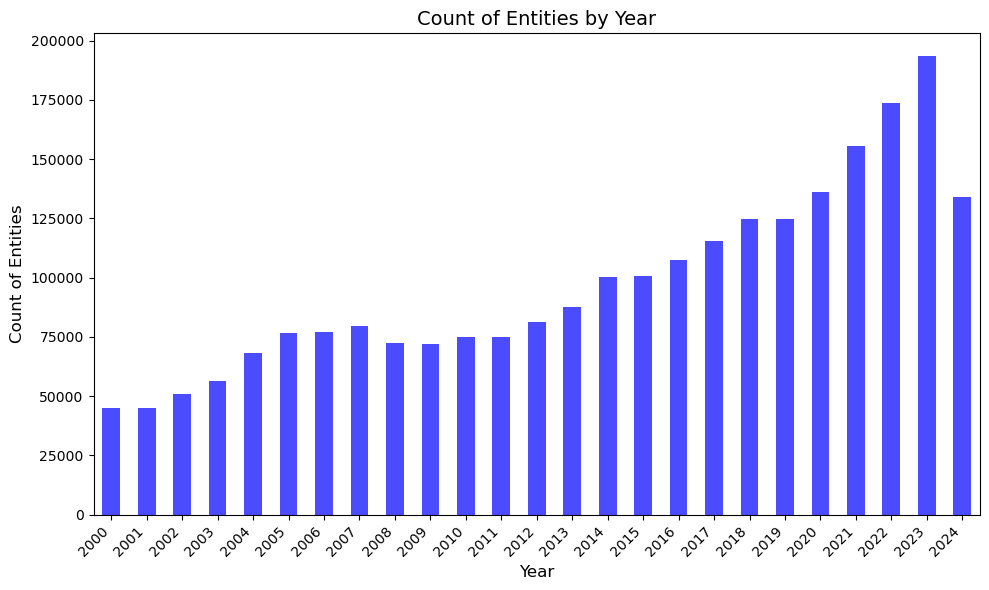

In [35]:
# Extract the year from entityformdate
df_clean['year'] = df_clean['entityformdate'].dt.year

# Group by the year and count the entities
entity_counts_by_year = df_clean.groupby('year').size()

# Plot the bar chart
plt.figure(figsize=(10, 6))
entity_counts_by_year.plot(kind='bar', color='blue', alpha=0.7)

# Add title and labels
plt.title('Count of Entities by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Entities', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

In [36]:
# Check the value counts of "entitystatus"
df_clean['entitystatus'].value_counts()

entitystatus
Delinquent                    921634
Good Standing                 908891
Voluntarily Dissolved         439227
Withdrawn                      58027
Administratively Dissolved     55552
Noncompliant                   28312
Revoked                         5795
Merged                          4190
Exists                          3918
Converted                       3155
Judicially Dissolved             262
Effectiveness Prevented          156
Registered Agent Resigned        117
Dissolved (Term Expired)         110
Name: count, dtype: int64

In [37]:
# Check the value counts of "entitytype"
df_clean['entitytype'].value_counts()

entitytype
DLLC        1756381
DPC          345748
FLLC         104858
FPC           85328
DNC           82841
DLLP          10475
DLP            8864
DLLLP          8395
FNC            6928
FO             4865
FLP            4680
GP             3412
DPC-PBC        2694
FLLP            923
DC56            630
UNA             464
DLPA            451
FLLLP           413
DLCA            293
CS              286
FCOOP           123
DC55            110
DLCA-PBC         84
DC56-PBC         51
DC55-PBC         27
FLPA              6
IC                6
FLCA              5
DT                4
SP                1
Name: count, dtype: int64

In [38]:
# Define a function to categorize entity types
def categorize_entitytype(entitytype):
    if entitytype in ["DPC", "FPC", "DLCA", "CS", "DLCA-PBC", "FLCA", "DPC-PBC"]:
        return "corporation"
    elif entitytype in ["DNC", "FNC"]:
        return "non_profit"
    elif entitytype in ["DC56", "DC55", "FCOOP", "DC56-PBC", "DC55-PBC"]:
        return "cooperative"
    elif entitytype in ["DLLC", "FLLC", "DLLP", "DLLLP", "FLLLP", "FLLP"]:
        return "limited_liability"
    elif entitytype in ["DLP", "FLP", "GP", "DLPA", "FLPA"]:
        return "partnership"
    elif entitytype in ["FO", "SL", "DT"]:
        return "financial_insurance"
    elif entitytype == "SP":
        return "sole_proprietor"
    elif entitytype in ["UNA", "WC"]:
        return "other"
    else:
        return "unknown"  # Handle any unlisted types

# Apply the function to create the new 'entitytype_group' column
df_clean['entitytype_group'] = df_clean['entitytype'].apply(categorize_entitytype)

# Display the first few rows to check the new column
df_clean[['entitytype', 'entitytype_group']].head()

,entitytype,entitytype_group
2330,DPC,corporation
32827,DPC,corporation
34220,DPC,corporation
34252,DPC,corporation
34957,DPC,corporation


In [39]:
# Create the new column 'entityexists' with True for "Good Standing" and "Exists", False for all other values
df_clean['entityexists'] = np.where(df_clean['entitystatus'].isin(['Good Standing', 'Exists']), True, False)

# Display the first few rows to verify the new column
df_clean[['entitystatus', 'entityexists']].head()

,entitystatus,entityexists
2330,Administratively Dissolved,False
32827,Administratively Dissolved,False
34220,Administratively Dissolved,False
34252,Administratively Dissolved,False
34957,Administratively Dissolved,False


In [40]:
# Check the Value Counts of "entityexists"
df_clean['entityexists'].value_counts()

entityexists
False    1516537
True      912809
Name: count, dtype: int64

In [41]:
# Check the value counts of "entitytype_group"
df_clean['entitytype_group'].value_counts()

entitytype_group
limited_liability      1881445
corporation             434438
non_profit               89769
partnership              17413
financial_insurance       4869
cooperative                941
other                      464
unknown                      6
sole_proprietor              1
Name: count, dtype: int64

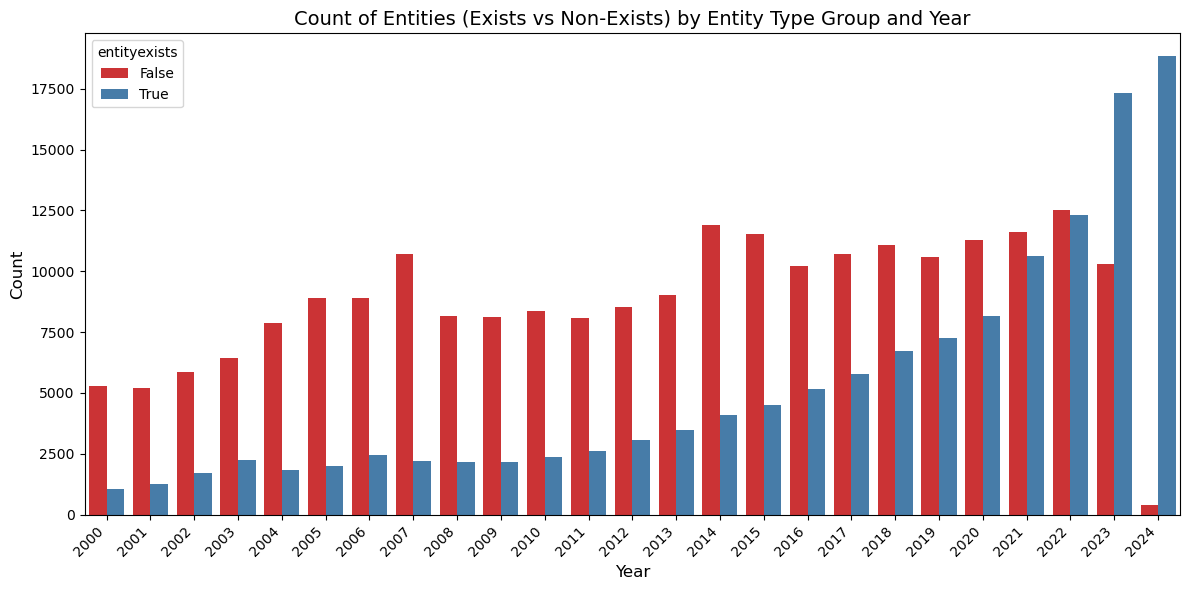

In [42]:
# Group by year, entitytype_group, and entityexists, and count the occurrences
grouped_data = df_clean.groupby(['year', 'entitytype_group', 'entityexists']).size().reset_index(name='counts')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='year', y='counts', hue='entityexists', errorbar = None, palette='Set1')

# Add title and labels
plt.title('Count of Entities (Exists vs Non-Exists) by Entity Type Group and Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()

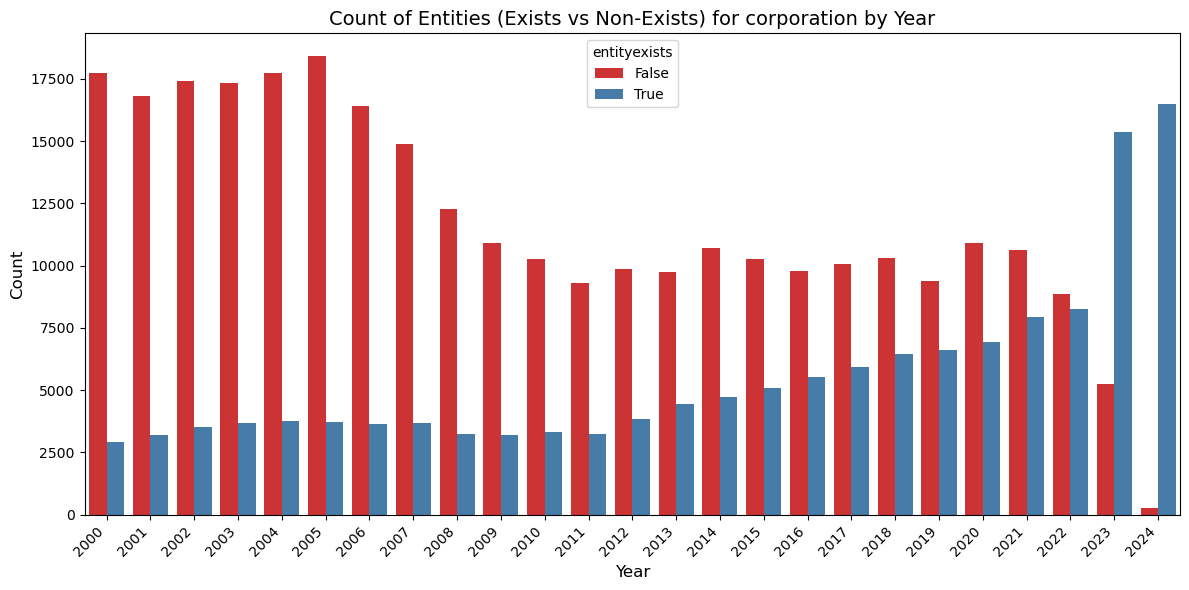

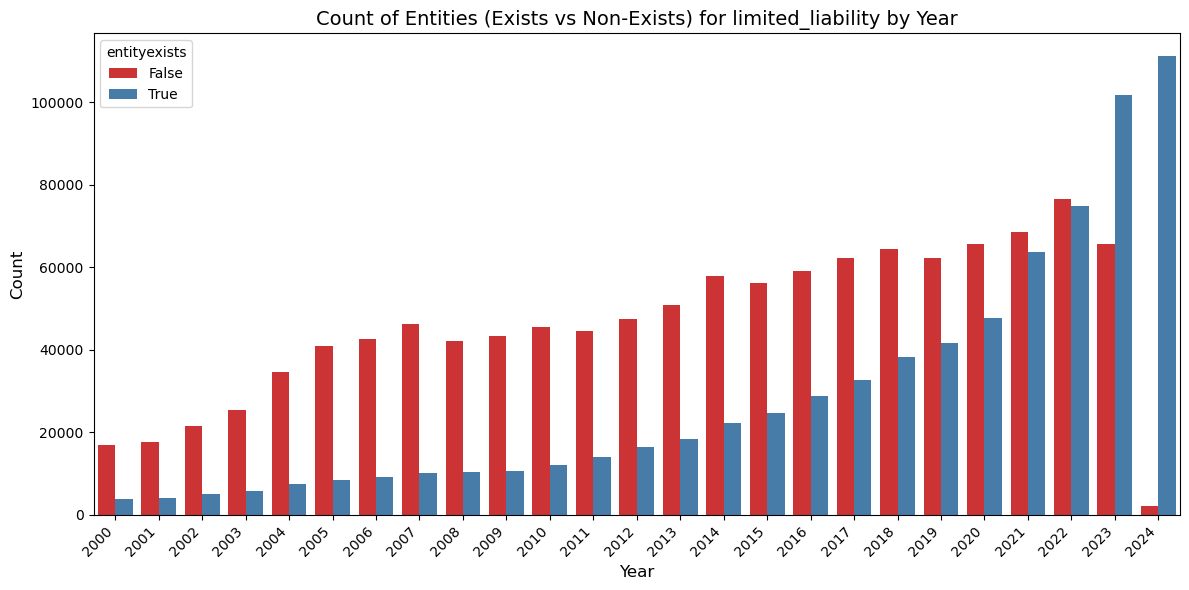

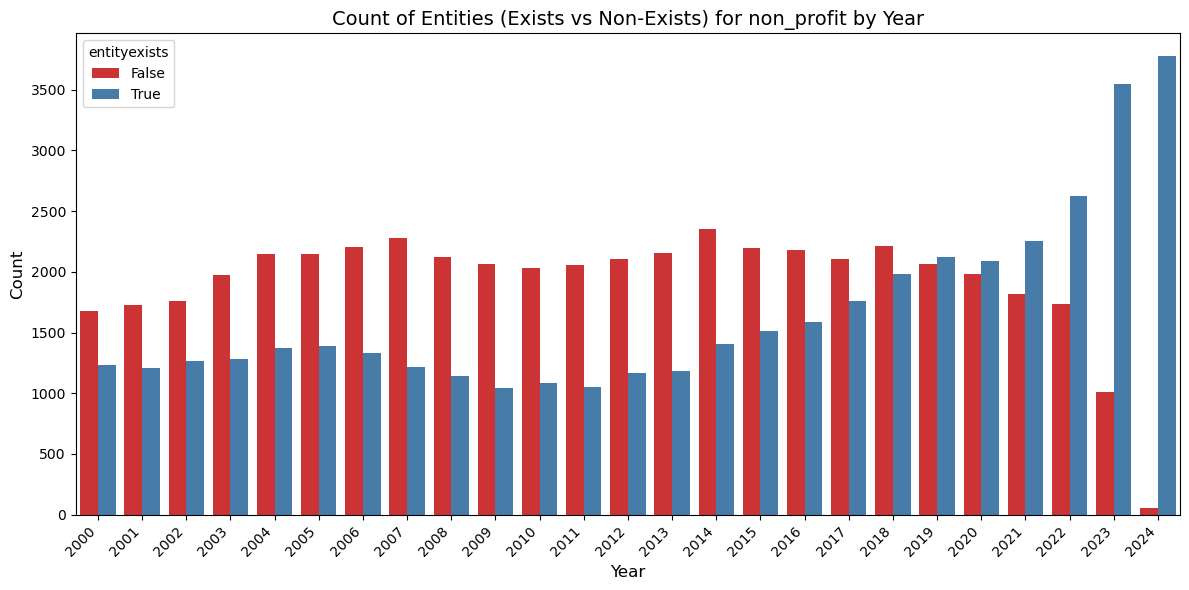

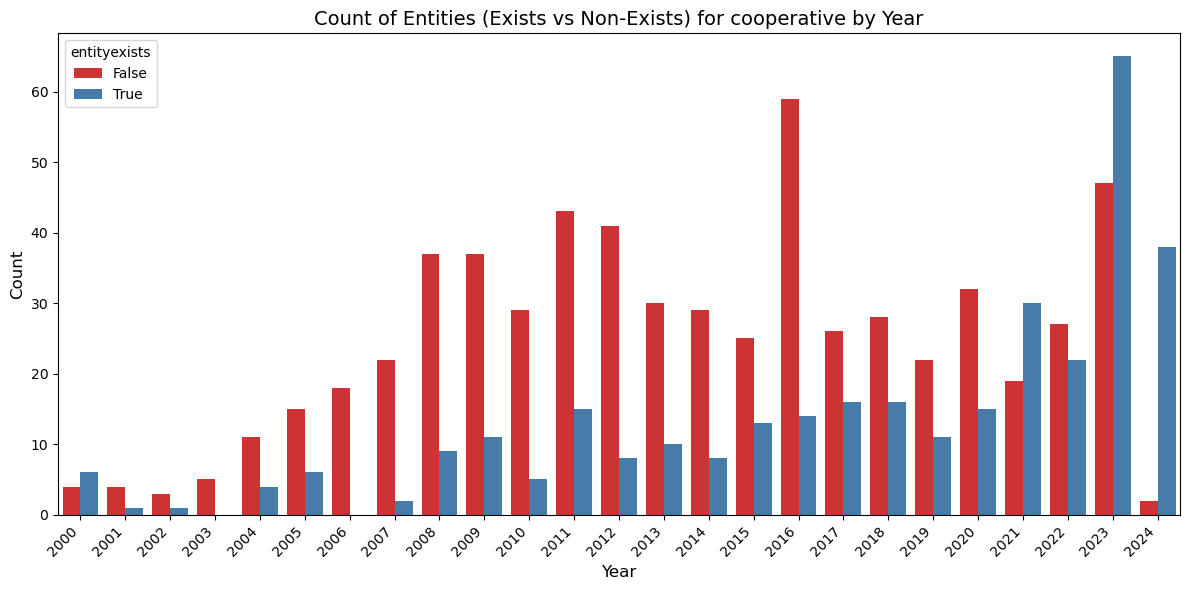

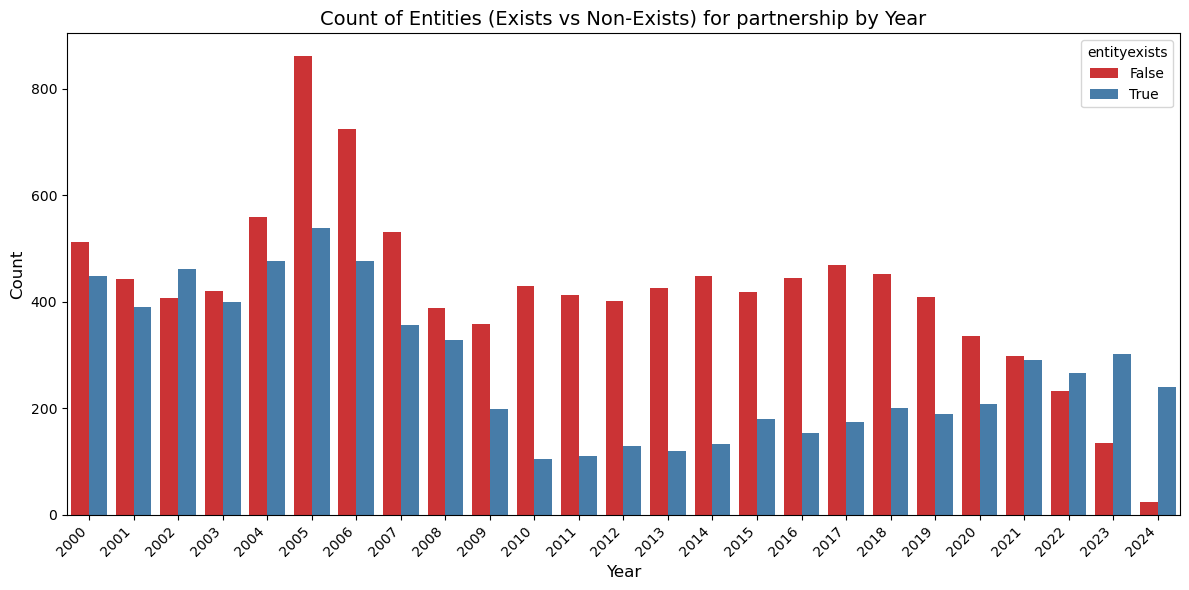

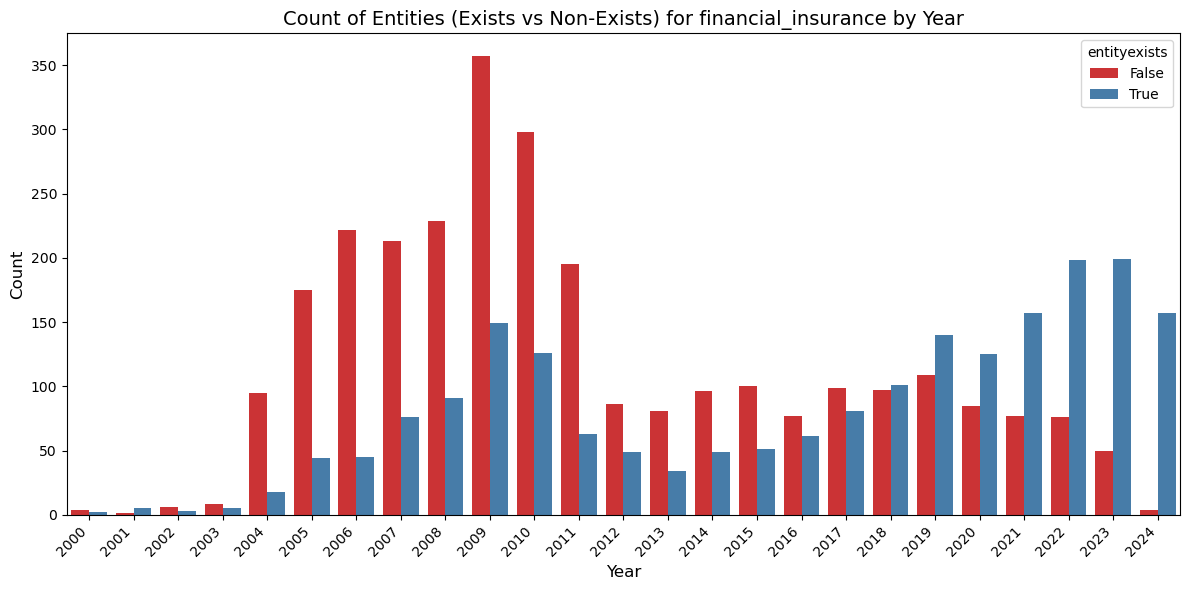

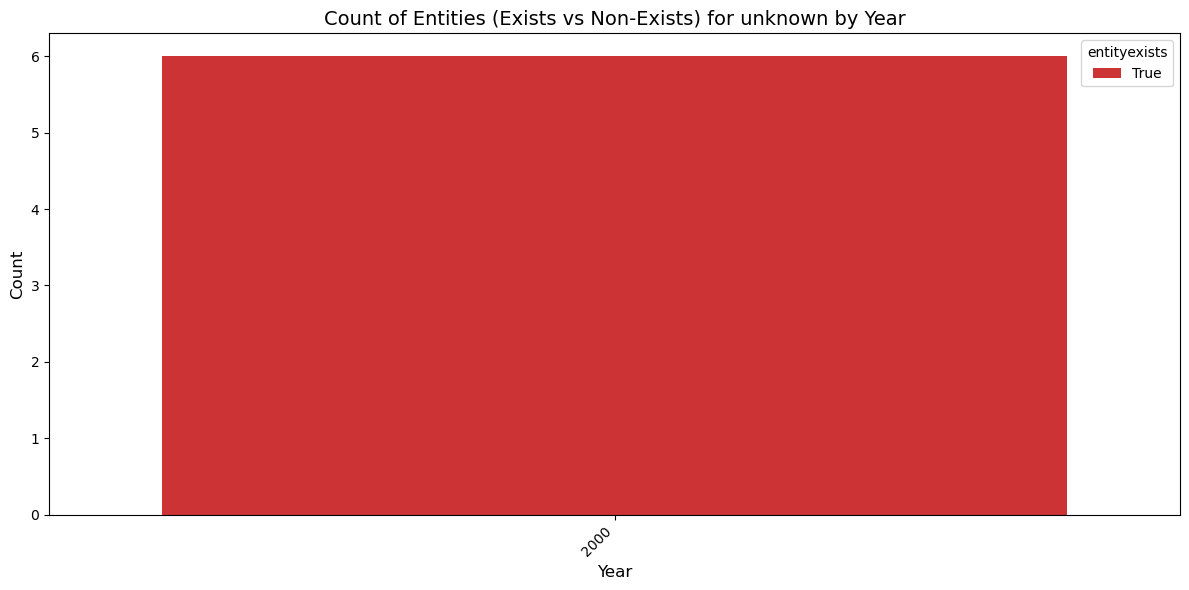

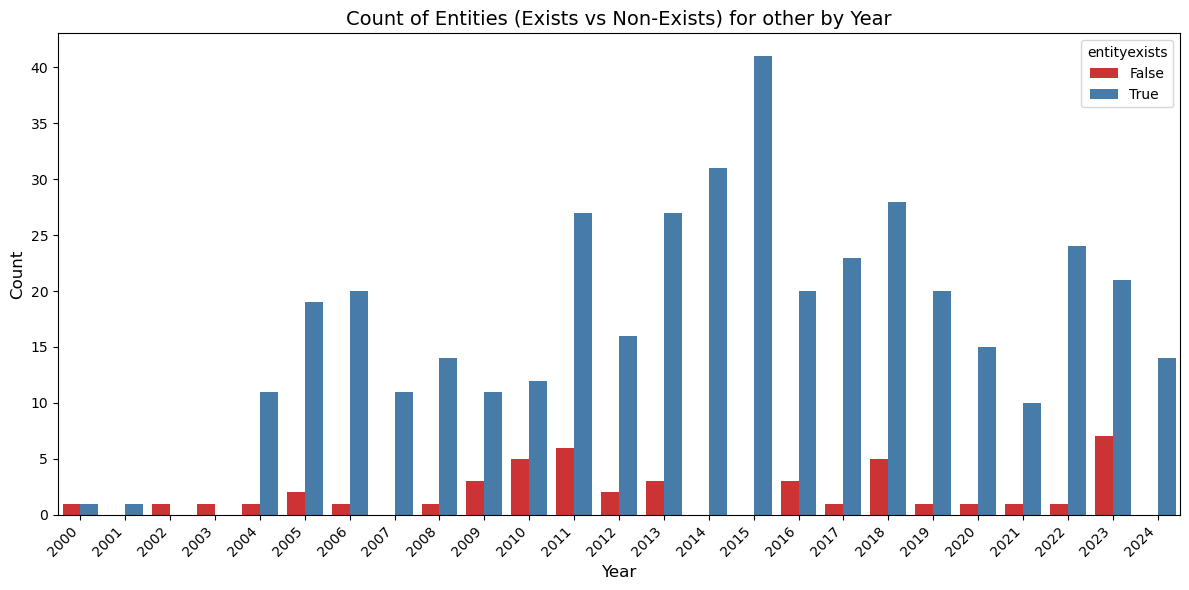

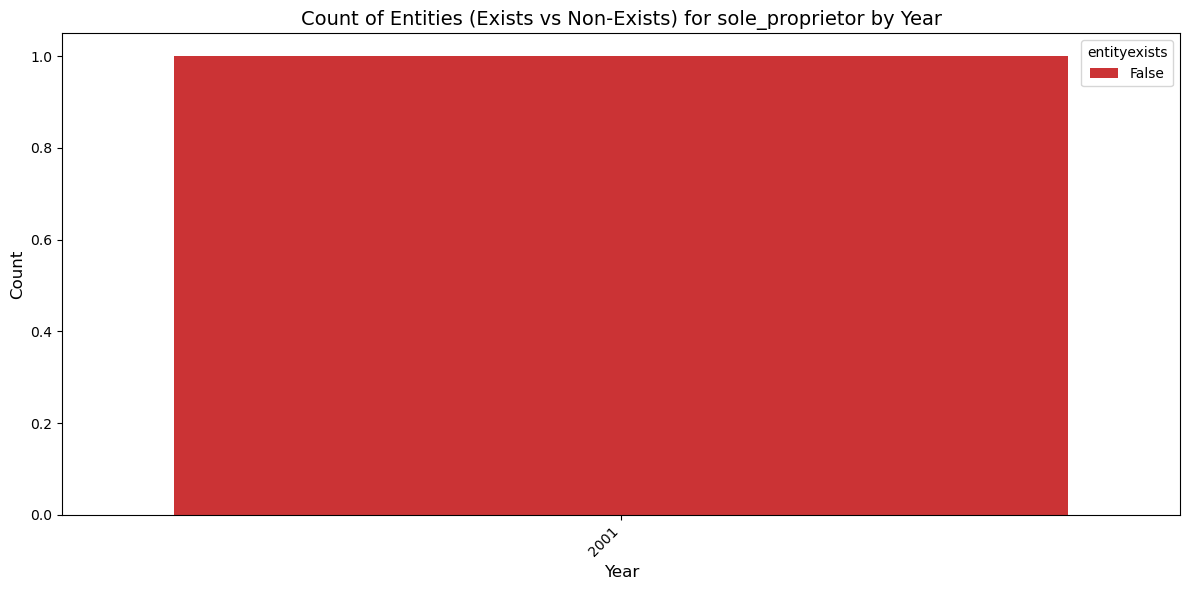

In [43]:
# List of unique entitytype_group values to iterate over
entitytype_groups = df_clean['entitytype_group'].unique()

# Loop over each entitytype_group and create a separate plot
for group in entitytype_groups:
    # Filter the data for the current entitytype_group
    filtered_data = df_clean[df_clean['entitytype_group'] == group]
    
    # Group by year and entityexists, and count the occurrences
    grouped_data = filtered_data.groupby(['year', 'entityexists']).size().reset_index(name='counts')
    
    # Plot the data for the current entitytype_group
    plt.figure(figsize=(12, 6))
    sns.barplot(data=grouped_data, x='year', y='counts', hue='entityexists', errorbar=None, palette='Set1')
    
    # Add title and labels
    plt.title(f'Count of Entities (Exists vs Non-Exists) for {group} by Year', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right')
    
    # Adjust layout to fit everything
    plt.tight_layout()

    # Show the plot
    plt.show()

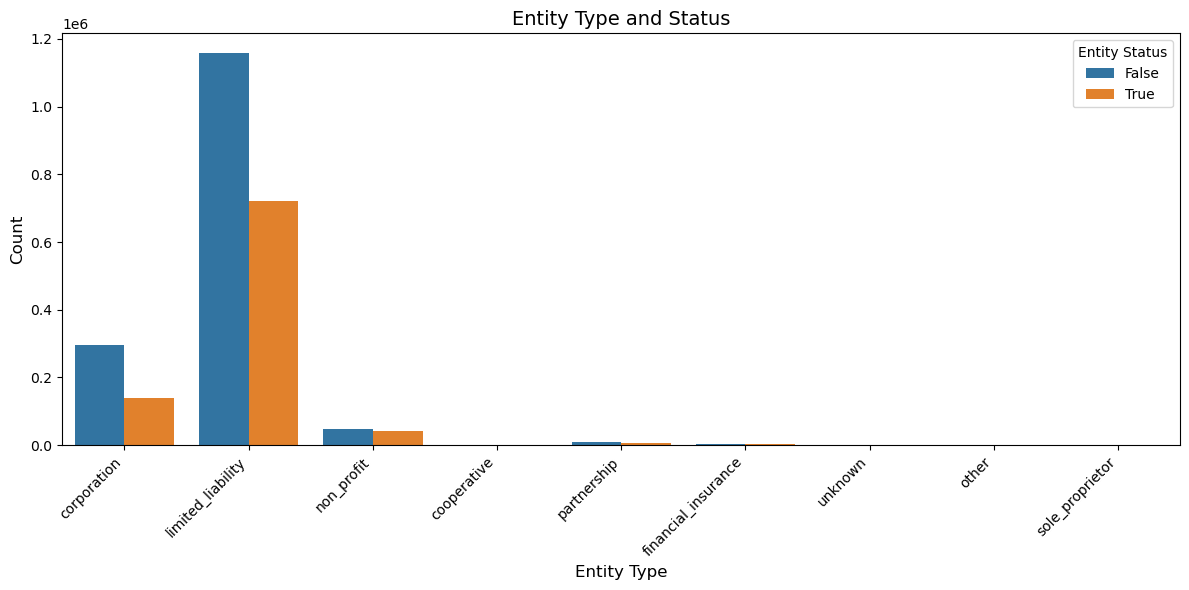

In [44]:
# Adjust the figure size for better readability
plt.figure(figsize=(12, 6))  # You can increase this size if needed

# Create the countplot
sns.countplot(data=df_clean, x="entitytype_group", hue="entityexists")

# Add a title and labels
plt.title("Entity Type and Status", fontsize=14)
plt.xlabel("Entity Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add legend title and adjust layout
plt.legend(title="Entity Status", fontsize=10)
plt.tight_layout()  # Ensure the plot elements fit without overlapping

# Show the plot
plt.show()

In [45]:
# Create the new column 'domestic' with True if principalstate is "CO", False otherwise
df_clean['domestic'] = np.where(df_clean['principalstate'] == 'CO', True, False)

# Display the first few rows to verify the new column
df_clean[['principalstate', 'domestic']].head()

,principalstate,domestic
2330,CO,True
32827,CO,True
34220,CO,True
34252,CO,True
34957,CO,True


In [46]:
# Check the value counts of "domestic"
df_clean['domestic'].value_counts()

domestic
True     2151842
False     277504
Name: count, dtype: int64

C:\Users\natal\AppData\Local\Temp\ipykernel_9824\2739028870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_existing['year'] = df_existing['entityformdate'].dt.year


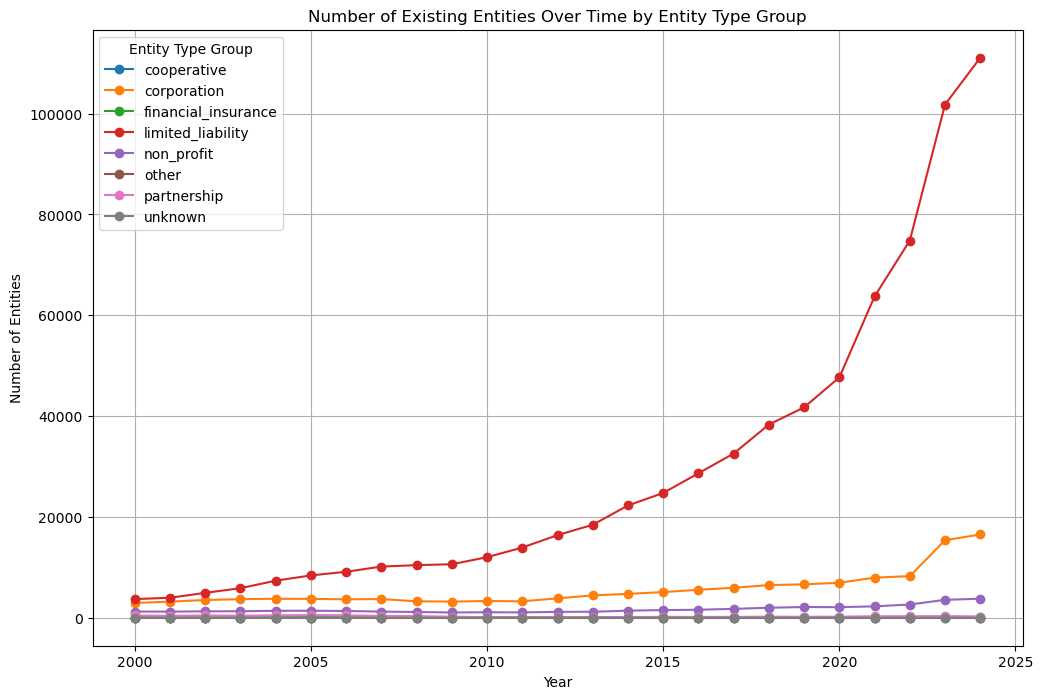

In [49]:
# Filter to include only entities that exist (True for entityexists)
df_existing = df_clean[df_clean['entityexists'] == True]

# Extract year from entityformdate
df_existing['year'] = df_existing['entityformdate'].dt.year

# Group by year and entitytype_group, and count the number of entities
entities_over_time = df_existing.groupby(['year', 'entitytype_group']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 8))

for entitytype in entities_over_time.columns:
    plt.plot(entities_over_time.index, entities_over_time[entitytype], marker='o', label=entitytype)

# Adding labels and title
plt.title('Number of Existing Entities Over Time by Entity Type Group')
plt.xlabel('Year')
plt.ylabel('Number of Entities')
plt.legend(title='Entity Type Group')
plt.grid(True)
plt.show()

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2429346 entries, 2330 to 2739991
Data columns (total 13 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   entityid                int64         
 1   entityname              object        
 2   principalcity           object        
 3   principalstate          object        
 4   principalcountry        object        
 5   entitystatus            object        
 6   jurisdictonofformation  object        
 7   entitytype              object        
 8   entityformdate          datetime64[ns]
 9   year                    int32         
 10  entitytype_group        object        
 11  entityexists            bool          
 12  domestic                bool          
dtypes: bool(2), datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 217.8+ MB


In [51]:
df_clean.to_csv('capstone_data_clean.csv', index = False)

#### D. Analysis

The analysis of the data will employ the chi-squared test of independence to evalute the relationship between business entity types and their success. This statistical technique was chosed because it is well-suited to examine associations between categorical variables. An advantage of the chi-square test is that it does not make assumptions about the distribution of the data, which makes it ideal for this dataset. However the chi-square test does not provide information about the strength or direction of a relationship between variables, only whether a relationship does exist. 

The first step of the analysis is to create contingency tables which summarize the data. The tables show the distribution of the status of entities across the different type groups that were created. Then the chi-squared statistic will be calculated along with the corresponding p-values, degrees of freedom, and expected frequences of each test. The outputs of the tests will provide the insights into whether the observed distributions of entities can be attributed to change or if there is a statistically significant relationship. 

The code and output of the test follows.

In [52]:
from scipy.stats import chi2_contingency

df = pd.read_csv("capstone_data_clean.csv")
df.head()

,entityid,entityname,principalcity,principalstate,principalcountry,entitystatus,jurisdictonofformation,entitytype,entityformdate,year,entitytype_group,entityexists,domestic
0,20001164595,"HILLTOP LANE, INC., Dissolved June 1, 2003",unknown,CO,unknown,Administratively Dissolved,CO,DPC,2000-08-23,2000,corporation,False,True
1,19991242659,"WALTAN SOLUTIONS, INC., Dissolved November 2, ...",unknown,CO,unknown,Administratively Dissolved,CO,DPC,2000-01-01,2000,corporation,False,True
2,20001032232,"AUTO REPAIR BY JR, INC., Dissolved December 1,...",unknown,CO,unknown,Administratively Dissolved,CO,DPC,2000-02-15,2000,corporation,False,True
3,20001032261,"WALKIE ONE, INC., Dissolved December 1, 2002",unknown,CO,unknown,Administratively Dissolved,CO,DPC,2000-02-15,2000,corporation,False,True
4,20001032263,"SAMORA INSURANCE AGENCY, INC., Dissolved Decem...",unknown,CO,unknown,Administratively Dissolved,CO,DPC,2000-02-15,2000,corporation,False,True


In [53]:
# Set up the data for the chi-squared test
contingency_table = pd.crosstab(df['entityexists'], df['entitytype_group'])
print("Contingency Table:")
print(contingency_table)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"P-value: {p:.4e}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Contingency Table:
entitytype_group  cooperative  corporation  financial_insurance  \
entityexists                                                      
False                     615       295563                 2840   
True                      326       138875                 2029   

entitytype_group  limited_liability  non_profit  other  partnership  \
entityexists                                                          
False                       1158796       48136     47        10539   
True                         722649       41633    417         6874   

entitytype_group  sole_proprietor  unknown  
entityexists                                
False                           1        0  
True                            0        6  
Chi-squared statistic: 9966.4137
P-value: 0.0000e+00
Degrees of freedom: 8
Expected frequencies:
[[5.87426129e+02 2.71201097e+05 3.03950884e+03 1.17450580e+06
  5.60389545e+04 2.89655392e+02 1.08701925e+04 6.24257310e-01
  3.74554386e+00]
 [3.5357

In [54]:
# Set up the data for the chi-squared test
contingency_table = pd.crosstab(df['entityexists'], df['domestic'])
print("Contingency Table:")
print(contingency_table)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"P-value: {p:.4e}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Contingency Table:
domestic       False    True 
entityexists                 
False         158893  1357644
True          118611   794198
Chi-squared statistic: 3566.7949
P-value: 0.0000e+00
Degrees of freedom: 1
Expected frequencies:
[[ 173233.90066627 1343303.09933373]
 [ 104270.09933373  808538.90066627]]


#### E. Data Summary and Implications

The results of the chi-squared analysis indicate that there are statistically significant relationships between both the entity type and it's success as well as the domestic status of the entity. These findings suggest that certain types of entities are more likely to remain active and that domestic entities in Colorado may have different survival rates compared to foreign entities. The large chi-squared statistic, 9966 and 3566, indicate a substantial difference between the observed and expected counts in the contigency tables. While the p-values of both are meaningfully zero, strongly indicating that the association between the success of an entity and it's group and domestic status is statistically significant. It is unlikely that the observed differences are due to random chance. 

Therefore there is strong evidence to reject the null hypothesis and conclude from this analysis that there is a significant difference in the survival rates among various businesses registered in Colorado. 

One limitation of this analysis is that the chi-square test does not account for other potential variables that influence survival rates. The test only provides association not causal factors. This analysis is also further limited in the overly simple categorization of success and failure. While the popular understanding of business success is whether a business is still in operation or not, the actual life cycle of various businesses is much more nuanced. Some businesses are not meant to stay operational long term, while others find success through merger or transformation. This understanding of the business life cycle is outside the scope of this project but would be a worthwhile update to the framework of future studies into business life cycles. 

**Recommendations**

Based on the findings it would be recommended for policymakers and stakeholders of the Colorado economy to focus on supporting the business types that exhibit lower survival rates. Cooperatives and Non-profits were found to have fewer entities in exstence than expected which could indicate that these types of entities may be less likely to still be operating. Examining the existing framework that Colorado uses to support non-profits could be worthwhile.

**Directions for Future Study**

1. To add further understanding to the life cycle of business entity types in Colorado a time series analysis could be done. This would examine the survival rate fluctuations overtime and could show responses to external factors like depressions, policy changes, and pandemics.

2. Another approach would be to conduct a regression analysis that incorporates additional variables like business size or industry to gain further nuance to business type success.

These courses of further study would be valuable additions to understanding the life cycle of businesses in Colorado.

#### Sources

Amankwah-Amoah, J., & Wang, X. (2019). Business Failures around the World: Emerging Trends and New Research Agenda. Journal of Business Research, 98, 367-369. Retrieved 24, 2024 from https://doi.org/10.1016/j.jbusres.2019.02.064

Colorado Department of State (2014, March 19). Business Entities of Colorado. Colorado Information Marketplace. Retrieved September 24, 2024, from https://data.colorado.gov/Business/Business-Entities-in-Colorado/4ykn-tg5h/about_data

Colorado Secretary of State (n.d.). Business Intelligence Center. Retrieved September 24, 2024, from https://www.sos.state.co.us/pubs/BIC/home.html

Colorado Department of State (n.d.). Colorado Information Marketplace Data Changes. Colorado Information Marketplace. Retrieved September 24, 2024, from https://data.colorado.gov/stories/s/pbek-aaa3

Columbia University: The Fu Foundation School of Engineering and Applied Science (n.d.). Learning Python for Data Analysis. Columbia Engineering Bootcamps. Retrieved September 24, 2024, from https://bootcamp.cvn.columbia.edu/blog/learning-python-for-data-analysis/

Deane, M. T. (2024, June 1). Top 6 Reasons New Businesses Fail. Investopedia. Retrieved September 24, 2024, from https://www.investopedia.com/financial-edge/1010/top-6-reasons-new-businesses-fail.aspx

Decoding Data Science (n.d.). Understanding the Chi-Square Test: A Comprehensive Guide. Decoding Data Science. Retrieved September 24, 2024, from https://decodingdatascience.com/chi-square-test-learn/

Geeks for Geeks (2023, December 5). SAS vs R vs Python. Retrieved September 24, 2024, from https://www.geeksforgeeks.org/sas-vs-r-vs-python/

Haltiwanger, J. C. (2021). Entrepreneurship During the COVID-19 Pandemic: Evidence from the Business Formation Statistics. National Bureau of Economic Research. https://doi.org/10.3386/w28912

Kakkad, S. A. (2017). Business Survival in the Construction Industry in Relation to Other Businesses: A Comparative Analysis [Master's Thesis, Texas A&M University]. Electronic Theses, Dissertations, and Records of Study (2002– ). Retrieved September 24, 2024, from https://hdl.handle.net/1969.1/161347

Ngugi, J. (2022, May 21). Handling Missing Values - Data Science. Medium. Retrieved September 24, 2024, from https://ngugijoan.medium.com/handling-missing-values-data-science-7b8e302264ee

Salunke, D. (2024, March 31). Understanding the Chi-Square Test: A Comprehensive Guide. Medium. Retrieved September 24, 2024, from https://medium.com/@dishant.salunke9/understanding-the-chi-square-test-a-comprehensive-guide-f3bece83b920

U.S. Small Business Administration (2024, August 18). Choose a Business Structure. U.S. Small Business Administration. Retrieved September 24, 2024, from https://www.sba.gov/business-guide/launch-your-business/choose-business-structure

Worku, Z. (2013). Analysis of Factors That Affect the Long-Term Survival of Small Businesses in Pretoria, South Africa. Journal of Data Analysis and Information Processing, 1(4), 67-84.Retrieved September 24, 2024, from https://doi.org/10.4236/jdaip.2013.14008

Zambrano Farias, F., Valls Martínez, M. D., & Antonio, P. (2021). Explanatory Factors of Business Failure: Literature Review and Global Trends. Sustainability, 13(18), 10154. Retrieved September 24, 2024, from https://doi.org/10.3390/su131810154